In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"font.size":9,"axes.titlesize":15,"axes.labelsize":9,
            "axes.titlepad":11, "axes.labelpad":9, "legend.fontsize":7,
            "legend.title_fontsize":7, 'axes.grid' : False})
import numpy as np
import pandas as pd
import os

In [2]:
DATASET_DIR = 'dataset'
ANNOTATIONS_CSV = os.path.join(DATASET_DIR, 'train_downsampled.csv')

In [3]:
df_train = pd.read_csv(ANNOTATIONS_CSV)
df_train.head()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,230.0,458.0,551.0,610.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,421.0,247.0,537.0,339.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN


In [4]:
df_train['class_name'] = df_train['class_name'].replace(['No finding', "Aortic enlargement", 'Pulmonary fibrosis', "Lung Opacity", "Other lesion", "leural effusion", "Pleural effusion", 'Pleural thickening']
                                                      ,["No_finding", "Aortic_enlargement", "Pulmonary_fibrosis", "Lung_Opacity", "Other_lesion", "leural_effusion" ,"Pleural_effusion", 'Pleural_thickening'])

In [5]:
df_finding_train = df_train[df_train.class_id != 14]
df_no_finding_train = df_train[df_train.class_id ==14]

### 1. Total of each class

In [6]:
df_sub_train_1 =  df_train[["class_name", "class_id"]].groupby(by = "class_name").count()
df_sub_train_1.rename(columns = {"class_id": "Count"}, inplace = True)
df_sub_train_1 = df_sub_train_1.sort_values(by = "Count", ascending= False)
df_sub_train_1 = df_sub_train_1.reset_index()

In [7]:
df_sub_train_1

,class_name,Count
0,No_finding,31818
1,Aortic_enlargement,7162
2,Cardiomegaly,5427
3,Pleural_thickening,4842
4,Pulmonary_fibrosis,4655
5,Nodule/Mass,2580
6,Lung_Opacity,2483
7,Pleural_effusion,2476
8,Other_lesion,2203
9,Infiltration,1247


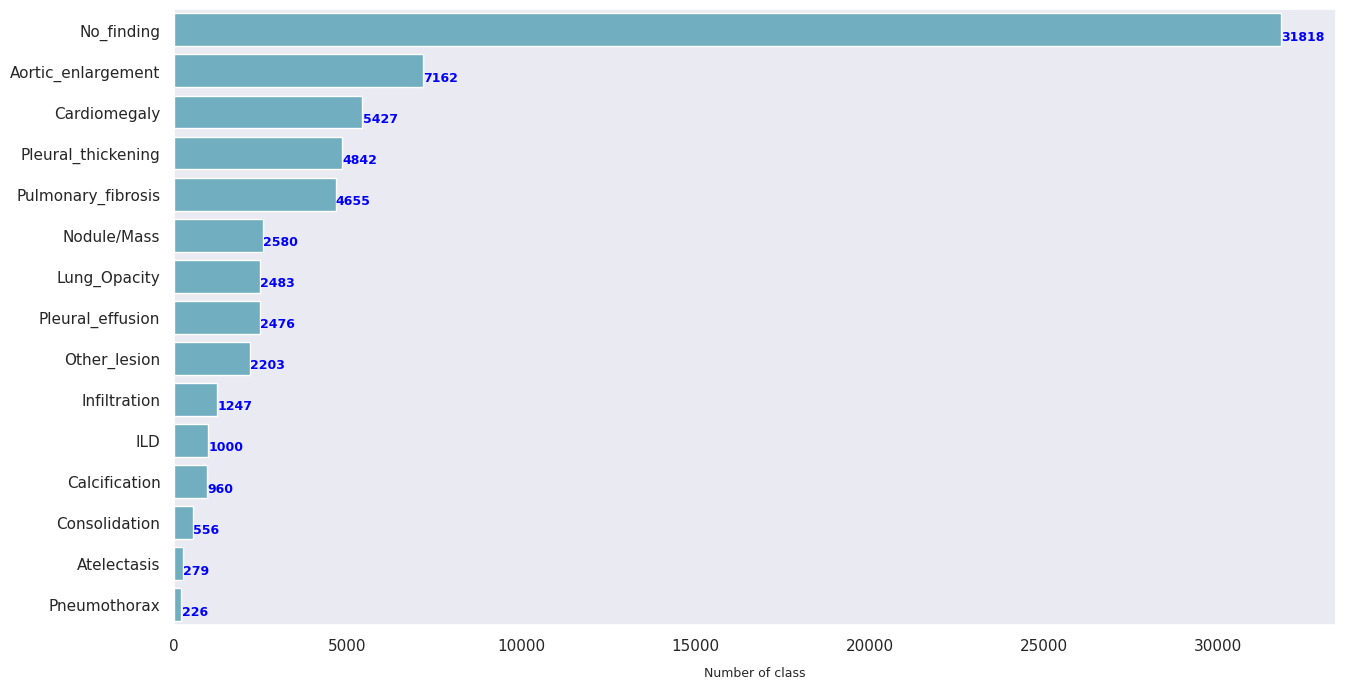

In [8]:
plt.figure(figsize= (15, 8))
sns.barplot(data = df_sub_train_1, y =  "class_name", x = "Count", color = "c")
for i, v in enumerate(df_sub_train_1["Count"].values):
  plt.text(v + 3, i + .25, str(int(v)), color='blue', fontweight='bold')
plt.xlabel("Number of class")
plt.ylabel(None)


plt.show()

+ without No_finding class

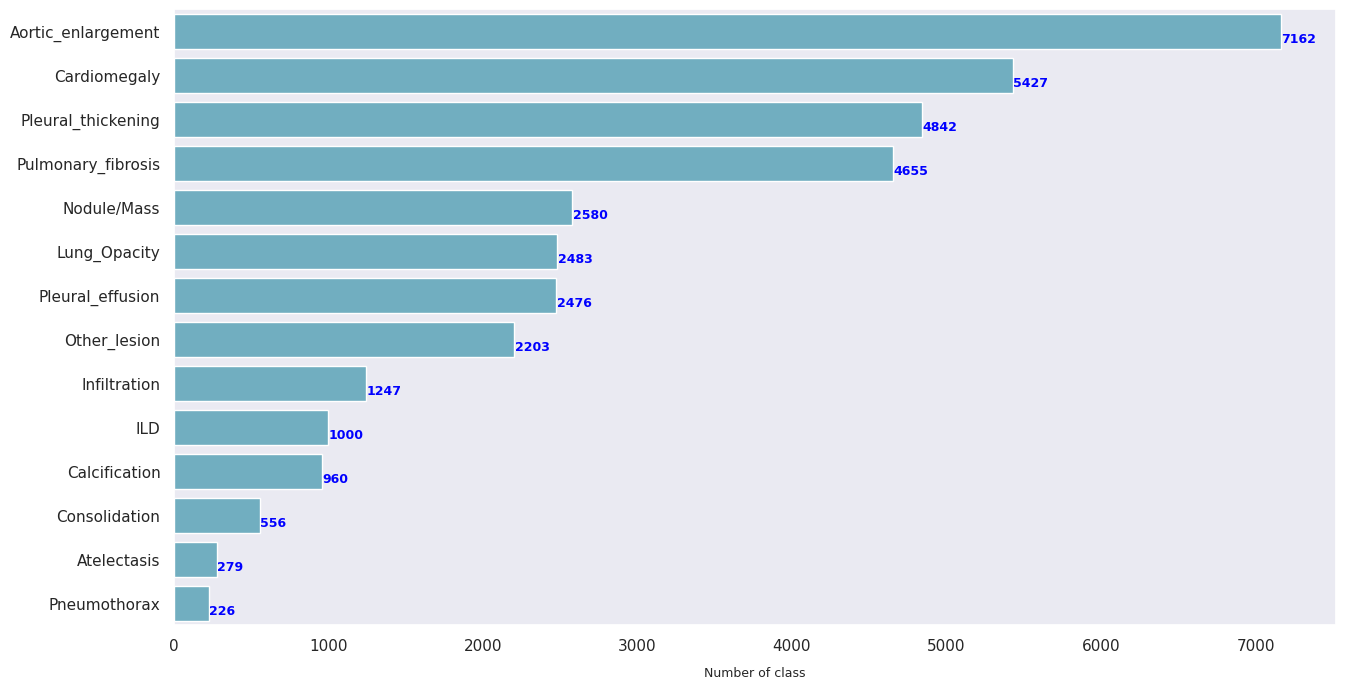

In [9]:
plt.figure(figsize= (15, 8))
sns.barplot(data = df_sub_train_1, y =  df_sub_train_1["class_name"][1:], x = df_sub_train_1["Count"][1:], color = "c")
for i, v in enumerate(df_sub_train_1["Count"][1:].values):
  plt.text(v + 3, i + .25, str(int(v)), color='blue', fontweight='bold')
plt.xlabel("Number of class")
plt.ylabel(None)
#plt.savefig(os.path.join(chart_path, "2.Class_name_count_drop_no_fidning.png"))
plt.show()


### 2. Why is dataset too many No_finding Class

In [10]:
df_sub_train_2 = df_train[["class_name", "rad_id"]]
# use crosstab to create contigency table
contigency_table = pd.crosstab(df_sub_train_2.class_name, df_sub_train_2.rad_id)
contigency_table.loc["Total_contribution"] = contigency_table.sum(axis = 0)

In [11]:
contigency_table

rad_id,R1,R10,R11,R12,R13,R14,R15,R16,R17,R2,R3,R4,R5,R6,R7,R8,R9
class_name,,,,,,,,,,,,,,,,,
Aortic_enlargement,0,2349,30,12,32,74,25,23,10,0,0,0,0,0,0,2066,2541
Atelectasis,0,115,6,8,10,13,8,2,2,0,0,0,0,0,0,37,78
Calcification,0,139,46,11,39,25,43,30,7,1,0,0,0,0,0,321,298
Cardiomegaly,0,1835,41,28,20,27,29,11,3,0,0,0,0,0,0,1765,1668
Consolidation,0,91,7,2,9,1,9,8,0,0,0,0,0,0,0,228,201
ILD,0,218,10,9,49,38,37,34,9,2,0,0,0,0,0,303,291
Infiltration,0,338,0,9,22,14,9,3,1,0,0,0,0,0,0,412,439
Lung_Opacity,0,929,12,4,39,21,14,8,3,0,0,0,0,0,0,411,1042
No_finding,1995,2321,1413,1580,1505,1300,1508,1565,743,3118,2285,1513,2783,2041,1733,2436,1979


In [12]:
# show the percentage of No_finding class of each radiologists
table_1 = contigency_table.copy()
table_1.loc["Percentage of No_finding"] = ((table_1.loc["No_finding"] / table_1.loc["Total_contribution"] ) *100).to_numpy().round(1)

In [13]:
table_1

rad_id,R1,R10,R11,R12,R13,R14,R15,R16,R17,R2,R3,R4,R5,R6,R7,R8,R9
class_name,,,,,,,,,,,,,,,,,
Aortic_enlargement,0.0,2349.0,30.0,12.0,32.0,74.0,25.0,23.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,2066.0,2541.0
Atelectasis,0.0,115.0,6.0,8.0,10.0,13.0,8.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,78.0
Calcification,0.0,139.0,46.0,11.0,39.0,25.0,43.0,30.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,321.0,298.0
Cardiomegaly,0.0,1835.0,41.0,28.0,20.0,27.0,29.0,11.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1765.0,1668.0
Consolidation,0.0,91.0,7.0,2.0,9.0,1.0,9.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,228.0,201.0
ILD,0.0,218.0,10.0,9.0,49.0,38.0,37.0,34.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,303.0,291.0
Infiltration,0.0,338.0,0.0,9.0,22.0,14.0,9.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,412.0,439.0
Lung_Opacity,0.0,929.0,12.0,4.0,39.0,21.0,14.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,411.0,1042.0
No_finding,1995.0,2321.0,1413.0,1580.0,1505.0,1300.0,1508.0,1565.0,743.0,3118.0,2285.0,1513.0,2783.0,2041.0,1733.0,2436.0,1979.0


In [14]:

df_sub_train_3 = pd.DataFrame({"Percentage of No_finding": table_1.loc["Percentage of No_finding"].values, 
                               "Radiologist_ID": table_1.columns.values})
df_sub_train_3 = df_sub_train_3.sort_values(by = "Percentage of No_finding", axis = 0, ascending= False)

In [15]:
df_sub_train_3

,Percentage of No_finding,Radiologist_ID
0,100.0,R1
14,100.0,R7
13,100.0,R6
12,100.0,R5
11,100.0,R4
10,100.0,R3
9,99.9,R2
8,91.5,R17
3,91.4,R12
7,88.8,R16


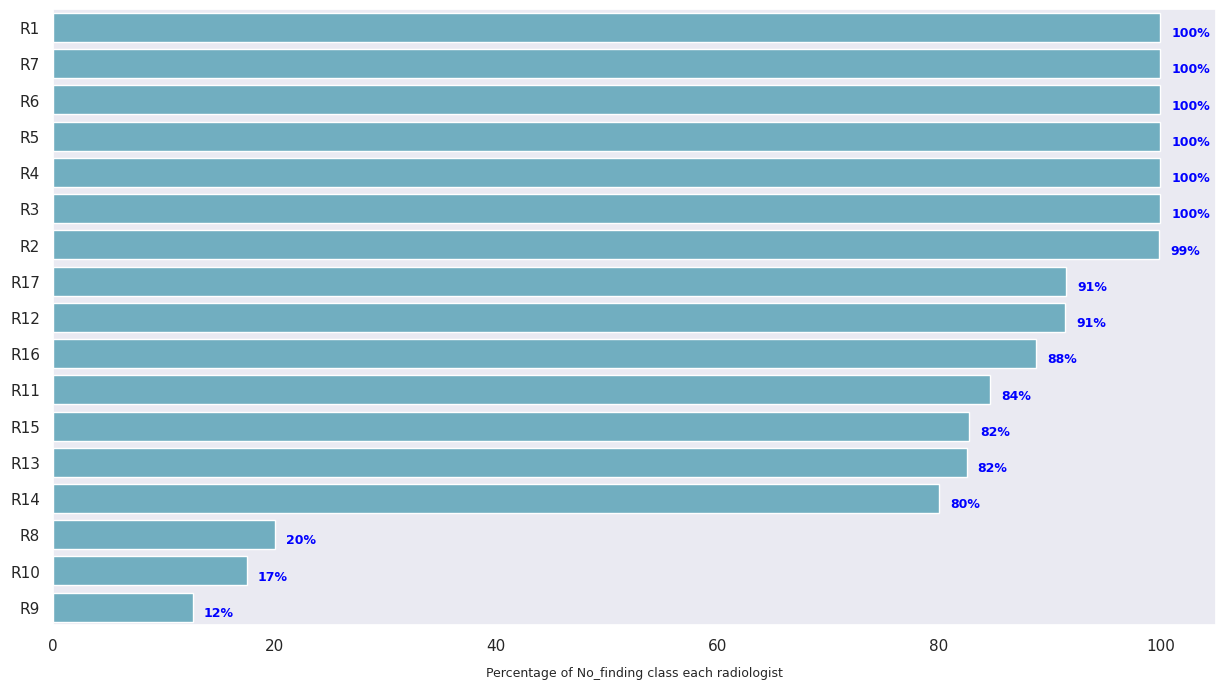

In [16]:
plt.figure(figsize= (15, 8))
sns.barplot( x = df_sub_train_3["Percentage of No_finding"], y = df_sub_train_3["Radiologist_ID"], color = "c")
for i, v in enumerate(df_sub_train_3["Percentage of No_finding"].values):
  plt.text(v + 1, i + .25, str(int(v))+"%", color='blue', fontweight='bold')
#plt.savefig()
plt.ylabel(None)
plt.xlabel("Percentage of No_finding class each radiologist")
#plt.savefig(os.path.join(chart_path, "3.Contribution_of_doctor_with_No_Fidning_case.png"))
plt.show()


### 3. Chi-square test (without no_finding class)

In [17]:
contigency_table = contigency_table.drop(["No_finding", "Total_contribution"]).drop(df_sub_train_3["Radiologist_ID"].values[:6].tolist(), axis = 1)

In [18]:
# Chi-square 
from scipy.stats import chi2_contingency, chi2
stat, p, dof, expected = chi2_contingency(contigency_table)
prob = 0.99
critical = chi2.ppf(prob, dof)
alpha = 1 - 0.99
print(f"probability = {prob:.3f}")
print(f"critical = {critical:.3f}")
print(f"stat = {stat:.3f}")
if p<= alpha:
  print(f"p-value <{alpha:.3f}")
  print("reject H0 --> dependent")
else:
  print(f"p-value >{alpha:.3f}")
  print("fail to preject H0 --> independent")

probability = 0.990
critical = 170.423
stat = 2883.076
p-value <0.010
reject H0 --> dependent


+ --> Have a relationship between classes and radiologist (CI 99%)

### 4. The percentage of contributions of each radiologist

In [19]:
radiologist_dist_by_percentage = df_train.rad_id.value_counts()
radiologist_dist_by_percentage = (radiologist_dist_by_percentage*100)/len(df_train)
radiologist_dist_by_percentage

R9     23.129252
R10    19.571811
R8     17.960951
R2      4.595518
R5      4.097830
R3      3.364549
R6      3.005271
R1      2.937539
R13     2.685750
R15     2.684277
R16     2.595930
R7      2.551757
R12     2.545867
R11     2.458992
R14     2.391260
R4      2.227818
R17     1.195630
Name: rad_id, dtype: float64

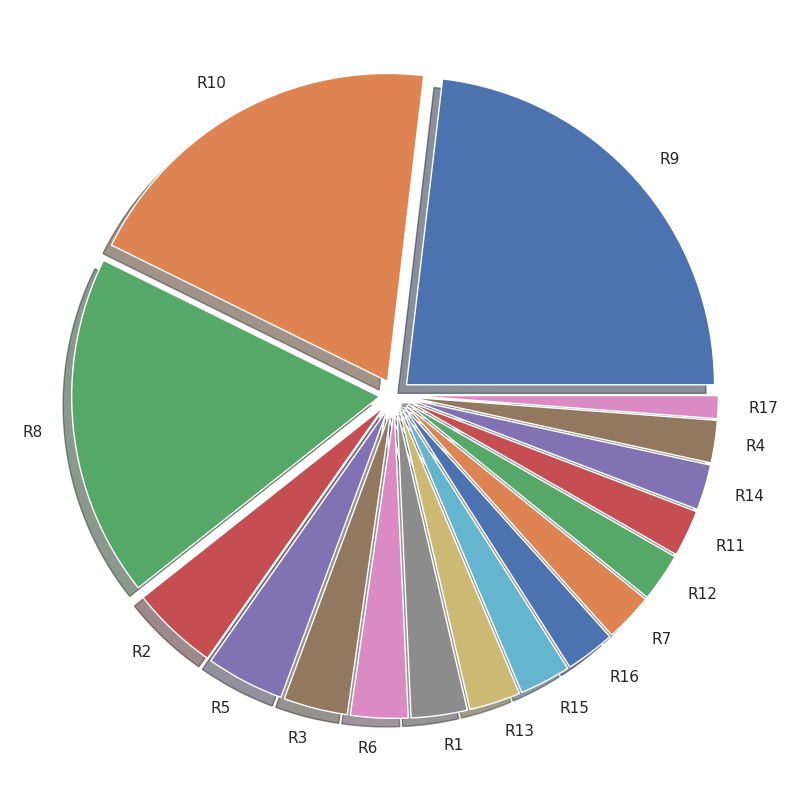

In [20]:
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
plt.figure(figsize = (20,10))
plt.pie(x = radiologist_dist_by_percentage.values.tolist(), 
        labels = radiologist_dist_by_percentage.index.tolist(),
        explode = explode, shadow = True)
#plt.savefig(os.path.join(chart_path, "4.Contribution_of_each_doctor.png"))

plt.show()

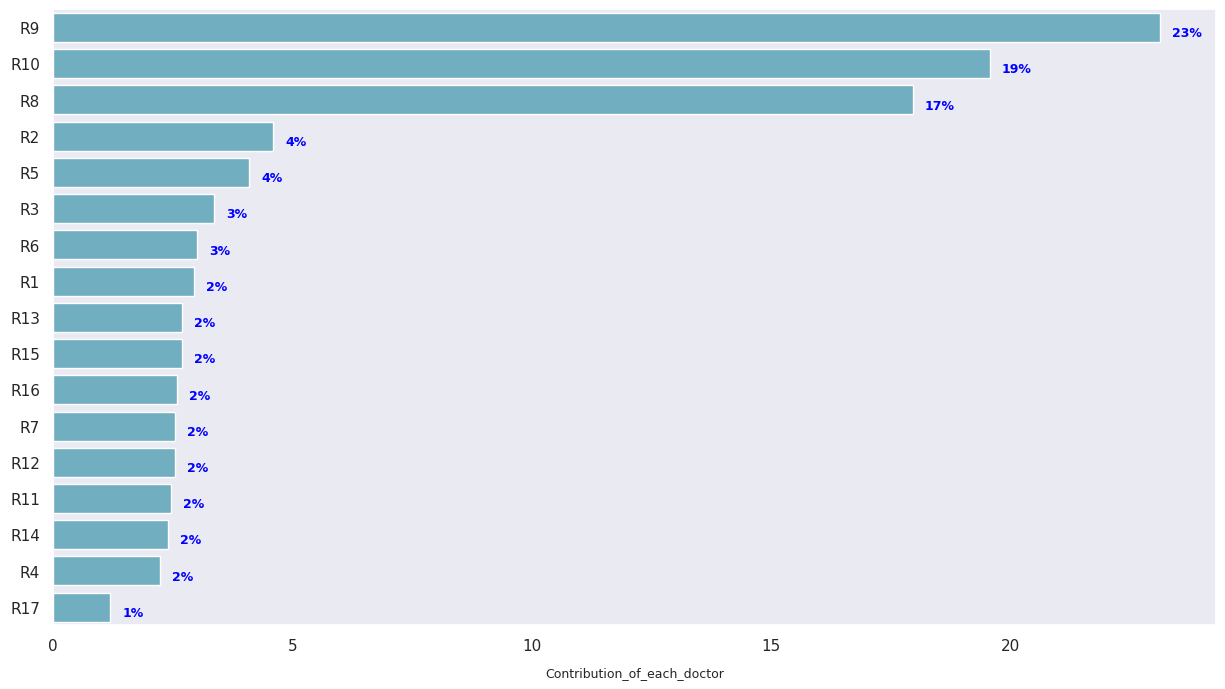

In [21]:
plt.figure(figsize= (15, 8))
sns.barplot( x =  radiologist_dist_by_percentage.values.tolist() , y = radiologist_dist_by_percentage.index, color = "c")
for i, v in enumerate( radiologist_dist_by_percentage.values.tolist() ):
  plt.text(v +.25, i + .25, str(int(v))+"%", color='blue', fontweight='bold')
#plt.savefig()
plt.ylabel(None)
plt.xlabel("Contribution_of_each_doctor")
#plt.savefig(os.path.join(chart_path, "4.1.Contribution_of_each_doctor.png"))
plt.show()


### 5. 3 dominant radiologist 

In [22]:
df_sub_train_4 = df_train[["class_name", "rad_id"]]
df_sub_train_4 = pd.crosstab(df_sub_train_4.class_name, df_sub_train_4.rad_id)

+ R9

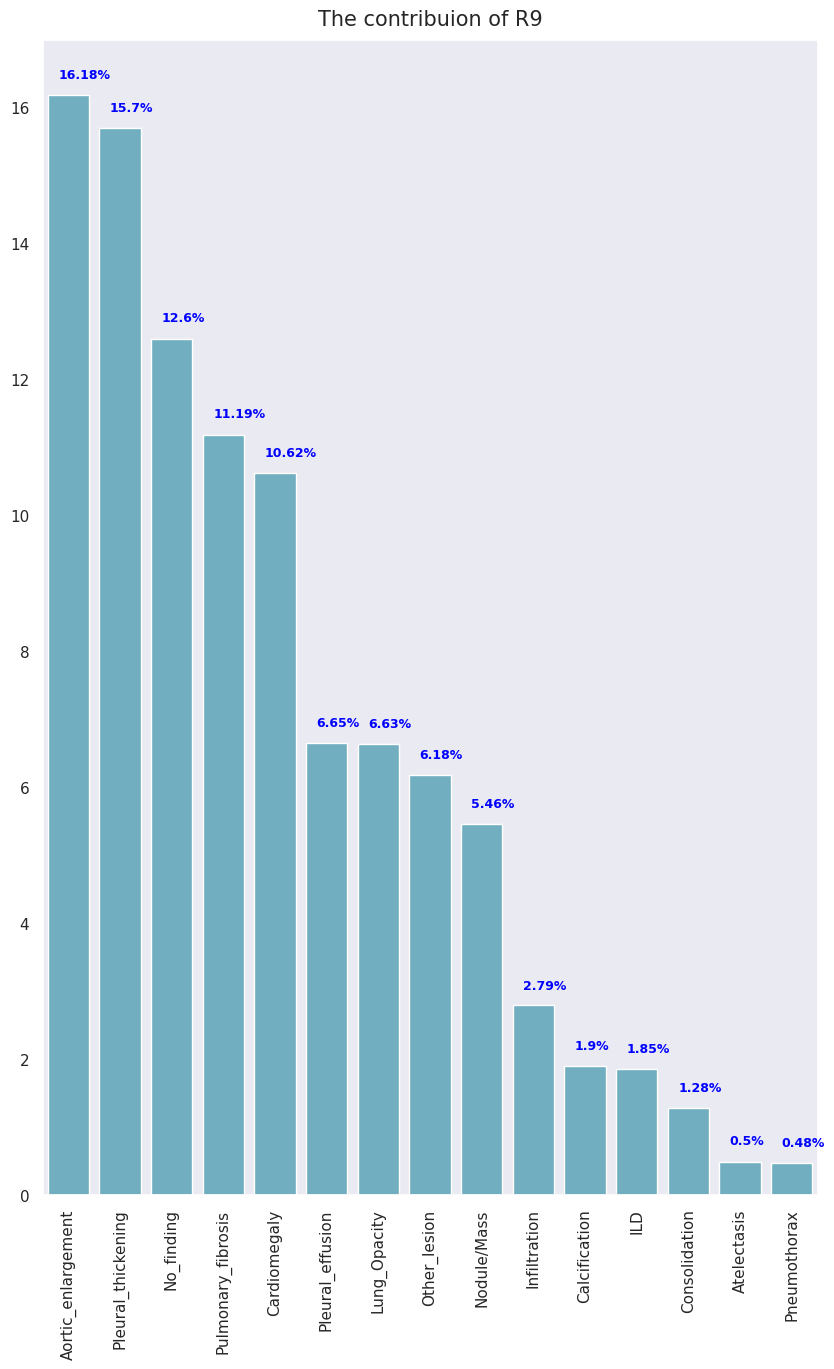

In [23]:
R9 = df_sub_train_4[["R9"]]
R9 = R9.sort_values(by = "R9", ascending= False)
plt.figure(figsize= (10, 15))
sns.barplot( x = R9.index, y = ((R9.R9 / R9.sum()[0])*100).values, color = "c")
for i, v in enumerate(((R9.R9 / R9.sum()[0])*100).values):
  v = round(v, 2)
  plt.text(i-0.2, v + 0.25, str(float(v))+"%", color='blue', fontweight='bold')
#plt.savefig()
#plt.ylabel(None)
#plt.xlabel("Percentage of No_finding class each radiologist")
plt.title("The contribuion of R9")
plt.xlabel(None)
plt.xticks(rotation = 90)
#plt.savefig(os.path.join(chart_path, "5.the contribuion of R9.png"))

plt.show()


+ R8

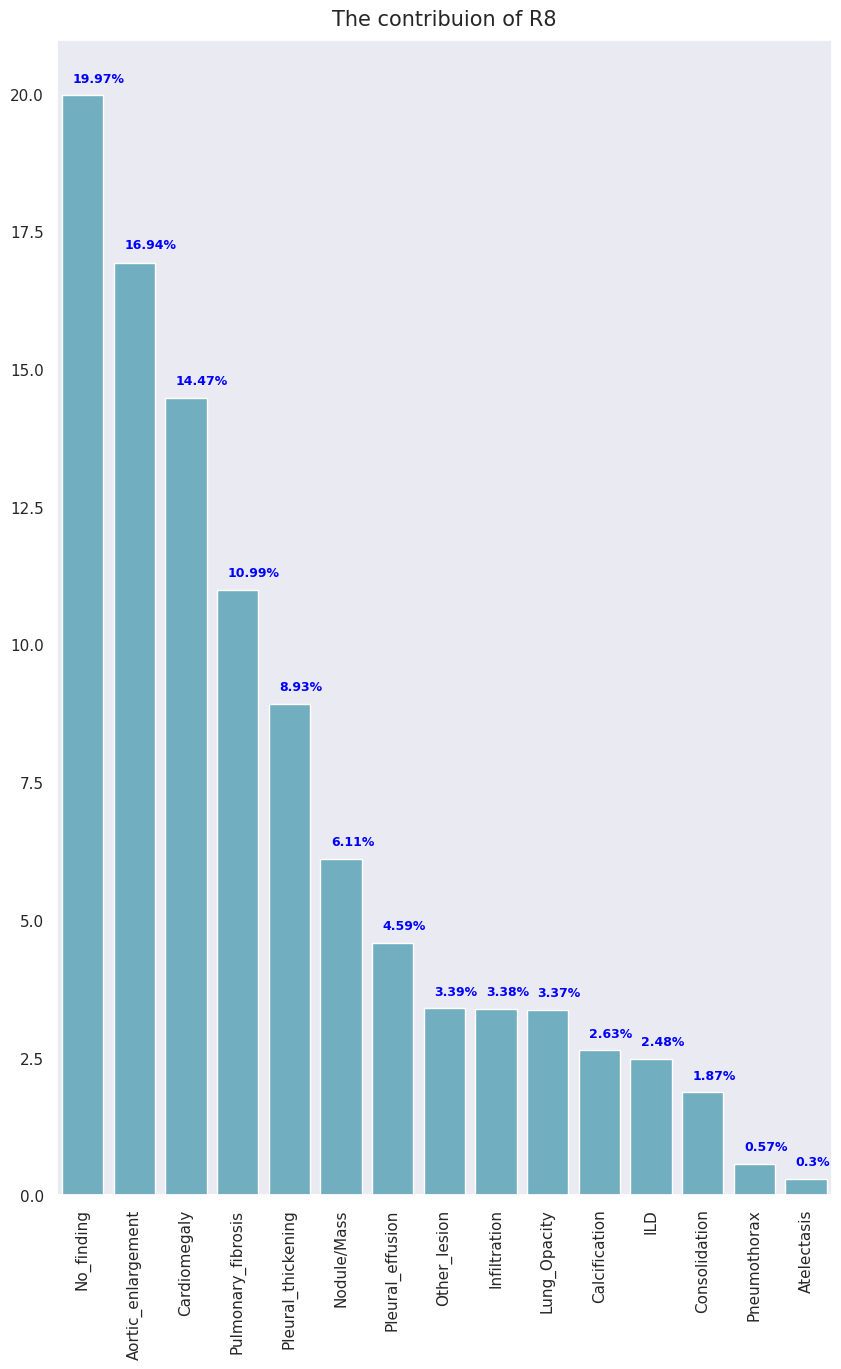

In [24]:
R8 = df_sub_train_4[["R8"]]
R8 = R8.sort_values(by = "R8", ascending= False)
plt.figure(figsize= (10, 15))
sns.barplot( x = R8.index, y = ((R8.R8 / R8.sum()[0])*100).values, color = "c")
for i, v in enumerate(((R8.R8 / R8.sum()[0])*100).values):
  v = round(v, 2)
  plt.text(i-0.2, v + 0.25, str(float(v))+"%", color='blue', fontweight='bold')

plt.title("The contribuion of R8")
plt.xlabel(None)
plt.xticks(rotation = 90)
#plt.savefig(os.path.join(chart_path, "6.the contribuion of R8.png"))
plt.show()


+ R10

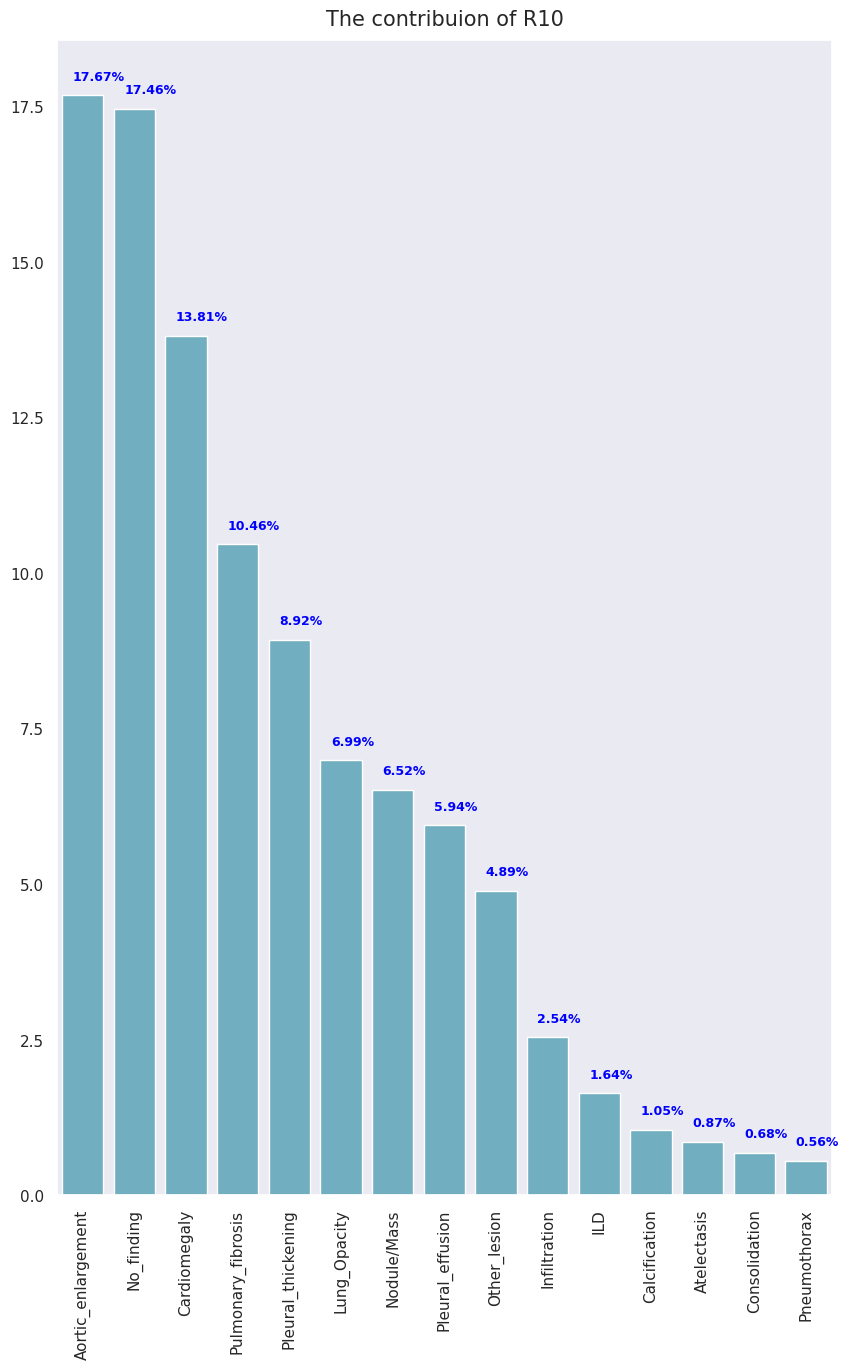

In [25]:
R10 = df_sub_train_4[["R10"]]
R10 = R10.sort_values(by = "R10", ascending= False)
plt.figure(figsize= (10, 15))
sns.barplot( x = R10.index, y = ((R10.R10 / R10.sum()[0])*100).values, color = "c")
for i, v in enumerate(((R10.R10 / R10.sum()[0])*100).values):
  v = round(v, 2)
  plt.text(i-0.2, v + 0.25, str(float(v))+"%", color='blue', fontweight='bold')
#plt.savefig()
#plt.ylabel(None)
#plt.xlabel("Percentage of No_finding class each radiologist")
plt.title("The contribuion of R10")
plt.xlabel(None)
plt.xticks(rotation = 90)
#plt.savefig(os.path.join(chart_path, "7.the contribuion of R10.png"))
plt.show()


### 6. Overview the contribution

In [26]:
import plotly.express as px
import plotly
import plotly.express as px
import plotly.graph_objects as go
FIG_FONT = dict(family="Helvetica, Arial", size=14, color="#7f7f7f")
LABEL_COLORS = [px.colors.label_rgb(px.colors.convert_to_RGB_255(x)) for x in sns.color_palette("coolwarm", 15)]

In [27]:
int_2_str = {i:df_train[df_train["class_id"]==i].iloc[0]["class_name"] for i in range(15)}
str_2_int = {v:k for k,v in int_2_str.items()}
int_2_clr = {str_2_int[k]:LABEL_COLORS[i] for i,k in enumerate(sorted(str_2_int.keys()))}
fig = go.Figure()
for i in range(15):
    fig.add_trace(go.Histogram(
        y=df_train[df_train["class_id"]==i]["rad_id"],
        marker_color=int_2_clr[i],
        name=f"<b>{i, int_2_str[i]}</b>", orientation='h'))

fig.update_xaxes(categoryorder="total descending")
fig.update_layout(title="<b>The contribution of each radiologist</b>",
                  barmode='stack',
                  xaxis_title="<b>Number of Annotations Made</b>",
                  yaxis_title="<b>Radiologist ID</b>",
                  font=FIG_FONT)

#plt.savefig(os.path.join(chart_path, "8.The contribution of each radiologist.png"))
fig.show()
